In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

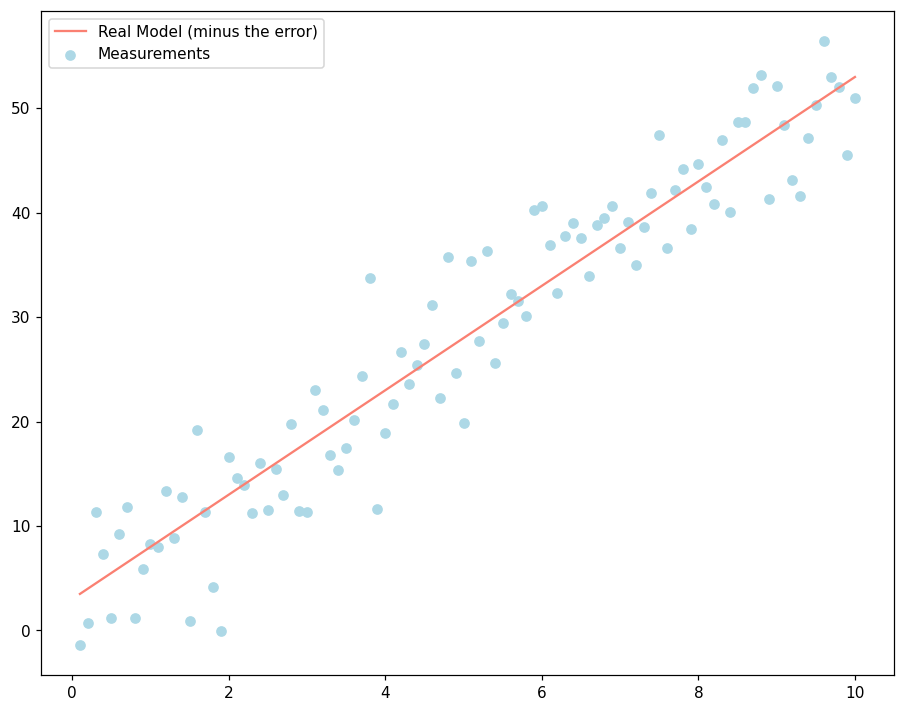

In [193]:
# Say we have some measurements
x = np.linspace(0.1, 10, 100)
# w_0 = 3, w_1 = 5
y = 3 + 5*x + 5*np.random.normal(size=x.size)

fig, ax = plt.subplots(figsize=(10,8), dpi=110)

ax.scatter(x, y, color='lightblue', label="Measurements")
ax.plot(x, 3 + 5*x, color='salmon', label="Real Model (minus the error)")
ax.legend();

If we want to model our mesurements we could use something like
$$\hat Y = w_0 + w_1 x_1 + \epsilon$$

Where $\epsilon$ is our error, but lets ignore it for now. We may want to find $w_0$ and $w_1$ such that the modelled line is the best fit possible for our data, one way we can define "best fit" is by saying it has the smallest error possible and we can define our error as the sum of the differences between our observations and our fitted model

$$E = \Sigma_{i=1}^n (\hat Y_i - Y_i)^2$$

Here we are squaring the difference term because it isn't useful to think about negative errors since then any model where our line is infinitely above the points will have the smallest error possible, also we don't use the absolute value $|\hat Y_i - Y_i|$ because we want this to be differentiable.

If we want the smallest error, we should find where the derivative is 0, lets rewrite the expression a bit

$$E = \Sigma_{i=1}^n ( (w_0 + w_1 x_{i1}) - Y_i)^2$$

And if we let $\vec w = (w_0 \space w_1)$ and $\vec x_i = (1 \space x_1)$ we have

$$E = ( \vec w \vec x - \vec Y)^2$$

We want to adjust $\vec w$ such that $E$ is minimal, so we got

$$\nabla_w E = 0$$

By linearity of the derivative we can write

$$\nabla_w (\vec w \vec x - \vec Y)^2  = 0$$

Which gives us

$$ 2 (\vec w \vec x - \vec Y) \vec x = 0$$

Dividing by 2 on both sides 

$$ \vec w \vec x^2 - \vec Y \vec x = 0$$

We then have

$$ \vec w = \vec Y \vec x (\vec x^{2})^{-1}$$

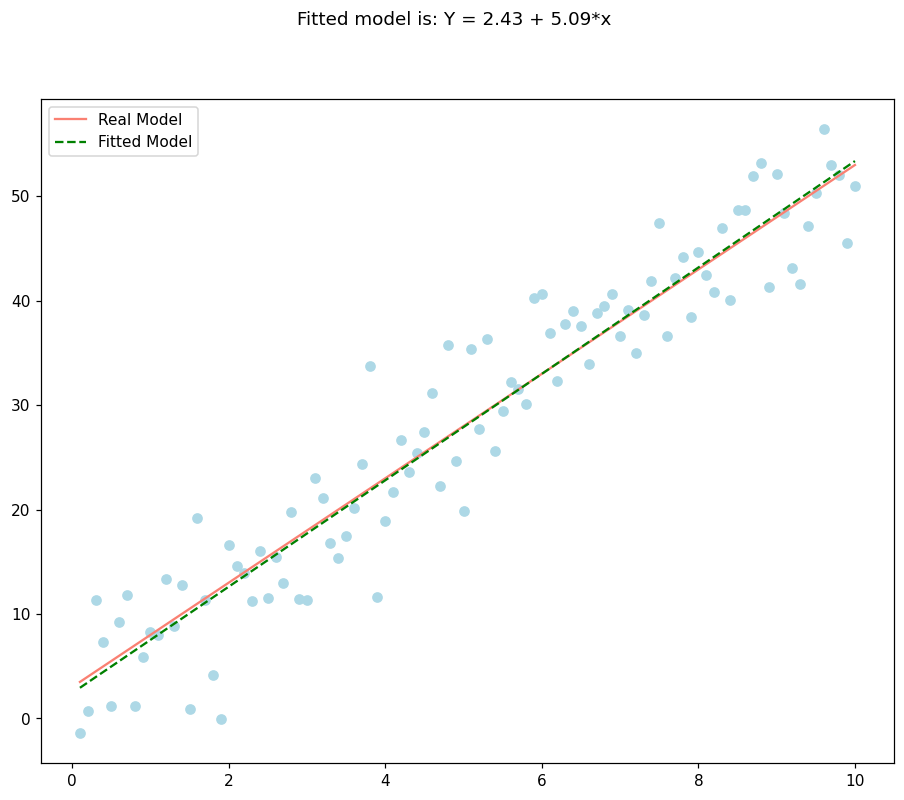

In [196]:
# Adding the ones for the w_0 coefficient
x_vec = np.array(list(zip(np.ones(x.size), x)))
# Squaring the matrix
x_vec_sqr = x_vec.T @ x_vec
# Applying our formula for the system of equation's solution
w0, w1 = (y @ x_vec) @ np.linalg.inv(x_vec_sqr)

fig, ax = plt.subplots(figsize=(10,8), dpi=110)

fig.suptitle(f"Fitted model is: Y = {w0:.2f} + {w1:.2f}*x")
ax.scatter(x, y, color='lightblue')
ax.plot(x, 3 + 5*x, color='salmon', label="Real Model")
ax.plot(x, w0 + w1*x, color='green', linestyle='--', label="Fitted Model")
ax.legend();

We can use the same principle with other families of functions given that we can find a set of linear equations for $\vec w$ that is solvable